# 05. DheerajKumar97/Employee-Salary-Prediction----python--ML

## Predictions with ML Regression Models (T2) - train.csv

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
df = pd.read_csv('05_train.csv')

In [2]:
# First 5 rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Last 5 rows of the dataset
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [4]:
# All available columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Preprocessing

All preprocessing steps are done in almost exactly the same way as the author.

In [5]:
# Let's get the categorical columns by checking the data type
cat_var = [var for var in df.columns if df[var].dtypes == "object"]
cat_var = df[cat_var]
# Also check the unique values in those columns
print("Gender ->", cat_var['Gender'].unique())
print("Age ->", cat_var["Age"].unique())
print("City_Category ->", cat_var["City_Category"].unique())
print("Stay_In_Current_City_Years ->", cat_var['Stay_In_Current_City_Years'].unique())
cat_var.head(10)

Gender -> ['F' 'M']
Age -> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category -> ['A' 'C' 'B']
Stay_In_Current_City_Years -> ['2' '4+' '3' '1' '0']


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
5,P00193542,M,26-35,A,3
6,P00184942,M,46-50,B,2
7,P00346142,M,46-50,B,2
8,P0097242,M,46-50,B,2
9,P00274942,M,26-35,A,1


In [6]:
# Is there any NaN values in these columns?
cat_var.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [7]:
# Give these categorical age ranges some ordered values
def order_age(Age):
    if Age == "0-17":      return 1
    elif Age == "18-25":   return 2
    elif Age == "26-35":   return 3
    elif Age == "36-45":   return 4
    elif Age == "46-50":   return 5
    elif Age == "51-55":   return 6
    elif Age == "55+":     return 7
    else:    return 0
cat_var['Age'] = cat_var['Age'].apply(order_age)

In [8]:
# Give these categorical current city years being stayed some ordered values
def order_stay_in_current_city_years(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == "0":      return 1
    elif Stay_In_Current_City_Years == "1":    return 2
    elif Stay_In_Current_City_Years == "2":    return 3
    elif Stay_In_Current_City_Years == "3":    return 4
    elif Stay_In_Current_City_Years == "4+":   return 5
cat_var['Stay_In_Current_City_Years'] = cat_var['Stay_In_Current_City_Years'].apply(order_stay_in_current_city_years)

In [9]:
# Latest status of categorical columns
cat_var

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,1,A,3
1,P00248942,F,1,A,3
2,P00087842,F,1,A,3
3,P00085442,F,1,A,3
4,P00285442,M,7,C,5
...,...,...,...,...,...
550063,P00372445,M,6,B,2
550064,P00375436,F,3,C,4
550065,P00375436,F,3,B,5
550066,P00375436,F,7,C,3


In [10]:
# Let's get the numerical columns by checking the data type (by not being object)
num_var = [var for var in df.columns if df[var].dtypes !="object"]
num_var = df[num_var]
num_var

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
550063,1006033,13,1,20,NaN,NaN,368
550064,1006035,1,0,20,NaN,NaN,371
550065,1006036,15,1,20,NaN,NaN,137
550066,1006038,1,0,20,NaN,NaN,365


In [11]:
# However, these two columns will be dropped due to having null values, plus user ID has no meaning here.
num_var = num_var.drop(['Product_Category_2','Product_Category_3','User_ID'], axis=1)
num_var

,Occupation,Marital_Status,Product_Category_1,Purchase
0,10,0,3,8370
1,10,0,1,15200
2,10,0,12,1422
3,10,0,12,1057
4,16,0,8,7969
...,...,...,...,...
550063,13,1,20,368
550064,1,0,20,371
550065,15,1,20,137
550066,1,0,20,365


## Prepare Train and Test Sets

In [12]:
# Create several dummy columns from categorical and numerical ones, then merge them with some other columns and purchase
dummy_gender = pd.get_dummies(cat_var['Gender'], prefix='gender')
dummy_age = pd.get_dummies(cat_var['Age'], prefix='age')
dummy_city = pd.get_dummies(cat_var['City_Category'], prefix='city')
dummy_city_years = pd.get_dummies(cat_var['Stay_In_Current_City_Years'], prefix='cityyears')
dummy_occupation = pd.get_dummies(num_var['Occupation'], prefix='occ')
dummy_prod_cat = pd.get_dummies(num_var['Product_Category_1'], prefix='prod_cat1')
df_cons = pd.concat([dummy_gender, dummy_age, dummy_city, dummy_city_years, dummy_occupation, dummy_prod_cat,
                    num_var['Marital_Status'], df['Purchase']], axis=1)
df_cons.head(8)

,gender_F,gender_M,age_1,age_2,age_3,age_4,age_5,age_6,age_7,city_A,...,prod_cat1_13,prod_cat1_14,prod_cat1_15,prod_cat1_16,prod_cat1_17,prod_cat1_18,prod_cat1_19,prod_cat1_20,Marital_Status,Purchase
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8370
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15200
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1422
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1057
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7969
5,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15227
6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,19215
7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,15854


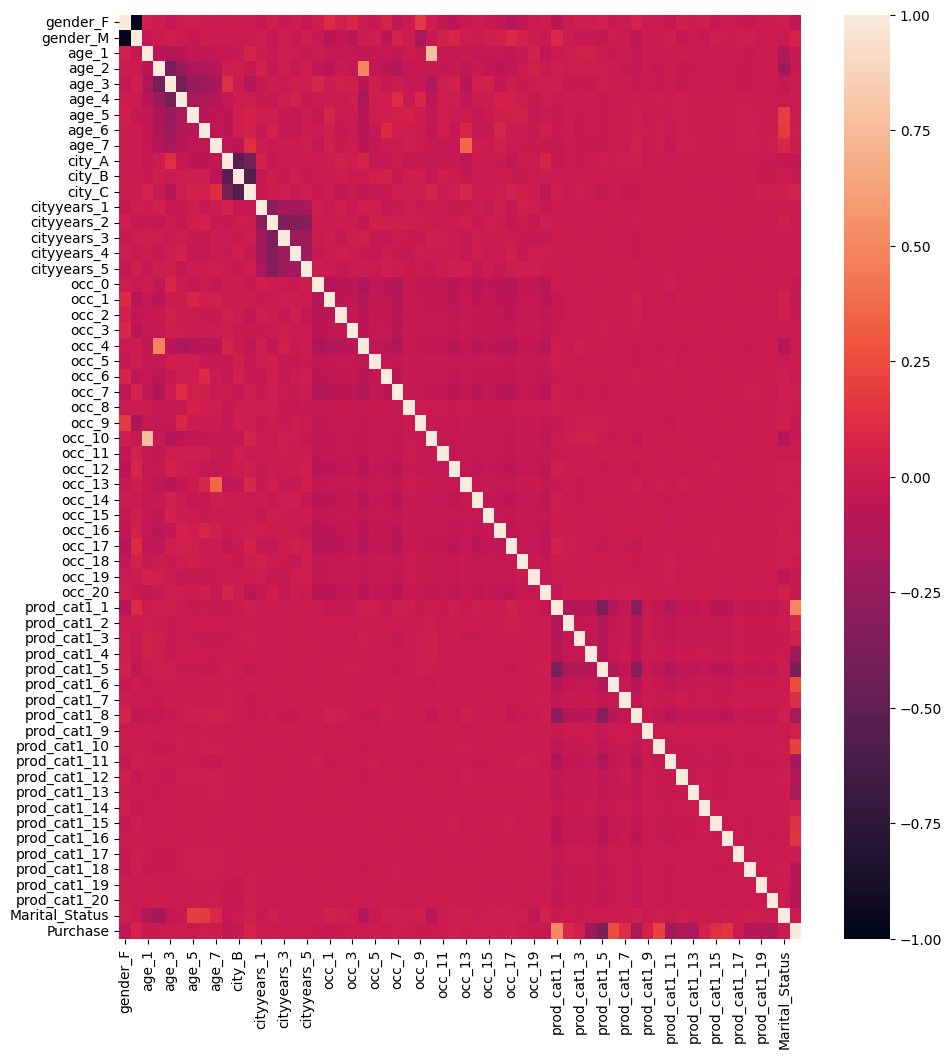

#### COLUMN CORRELATIONS AGAINST PURCHASE ####
gender_F         -0.060346
gender_M          0.060346
age_1            -0.011055
age_2            -0.008831
age_3            -0.001830
age_4             0.006707
age_5            -0.003317
age_6             0.014792
age_7             0.002904
city_A           -0.042465
city_B           -0.019098
city_C            0.061012
cityyears_1      -0.006605
cityyears_2      -0.002030
cityyears_3       0.005358
cityyears_4       0.002090
cityyears_5       0.000988
occ_0            -0.010576
occ_1            -0.019005
occ_2            -0.013975
occ_3            -0.003095
occ_4            -0.003872
occ_5             0.002072
occ_6            -0.000290
occ_7             0.011176
occ_8             0.002839
occ_9            -0.013409
occ_10           -0.009409
occ_11           -0.001464
occ_12            0.025995
occ_13            0.001007
occ_14            0.010772
occ_15            0.015416
occ_16            0.005713
occ_17            0.031099
occ_18  

In [13]:
# Get the correlations of all involved columns in a heat map
plt.figure(figsize=(11,12))
sns.heatmap(df_cons.corr())
plt.show()
print("#### COLUMN CORRELATIONS AGAINST PURCHASE ####")
print(df_cons.corr()['Purchase'])

### Type 2: Use Positively Correlated Columns Only

In [14]:
# Use 80% of the dataset as training, and 20% as testing
# X = df_cons.drop(columns='Purchase', axis=1)
X = df_cons[['gender_M','age_4','age_6','age_7','city_C','cityyears_3','cityyears_4','cityyears_5','occ_5','occ_7','occ_8','occ_12',
             'occ_13','occ_14','occ_15','occ_16','occ_17','prod_cat1_1','prod_cat1_2','prod_cat1_3','prod_cat1_6','prod_cat1_7',
             'prod_cat1_9','prod_cat1_10','prod_cat1_14','prod_cat1_15','prod_cat1_16','prod_cat1_17']]
Y = df_cons.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, " TEST SIZE:", x_test.shape)
print(X.columns)

TRAIN SIZE: (440054, 28)  TEST SIZE: (110014, 28)
Index(['gender_M', 'age_4', 'age_6', 'age_7', 'city_C', 'cityyears_3',
       'cityyears_4', 'cityyears_5', 'occ_5', 'occ_7', 'occ_8', 'occ_12',
       'occ_13', 'occ_14', 'occ_15', 'occ_16', 'occ_17', 'prod_cat1_1',
       'prod_cat1_2', 'prod_cat1_3', 'prod_cat1_6', 'prod_cat1_7',
       'prod_cat1_9', 'prod_cat1_10', 'prod_cat1_14', 'prod_cat1_15',
       'prod_cat1_16', 'prod_cat1_17'],
      dtype='object')


In [15]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [16]:
linreg = LinearRegression(fit_intercept=True, positive=False)
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [17]:
# Fit the training data into the linear reg. model, then make predictions on the test data
s_time = time.time()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.679 seconds.


In [18]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [-1.03692197e+02  1.14423931e+02  3.81950165e+02  2.92045091e+02
  4.17411832e+02  2.30383228e+01 -8.01879227e+00  2.75515725e+01
 -6.29108190e+01  1.07623299e+02 -2.44682051e+02  2.34184471e+02
  1.54816954e+02  1.72059889e+02  3.86702277e+02  9.25704495e+01
  1.16027648e+02  7.44188019e+03  5.10100019e+03  3.93494463e+03
  9.66152642e+03  1.02306764e+04  9.24017159e+03  1.34854538e+04
  6.97634608e+03  8.64049107e+03  8.62505408e+03  3.89503170e+03]
RANK: 28
INTERCEPT: 5986.456230052194


In [19]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   5978.437437777339 |     5977
  13440.671868163878 |    19203
   13848.80875100677 |    15582
   6300.175864782485 |     5942
  14786.283137867991 |    20266
   5986.456230052194 |     8611
   5986.456230052194 |     2762
   6094.079528786373 |     3935
  10330.793903337966 |     5722
   6739.019117129943 |     6038
   6009.494552835443 |     5191
  13849.679350761195 |    15719
   13586.38026343635 |    15499
  6395.8492697019865 |     8612
   5905.802355641086 |     7908
   5882.764032857838 |     8584
   6437.638118460028 |     3951
   6009.494552835443 |     8770
   6372.337497064663 |     7899
  19540.277741556798 |    23301


In [20]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
# The time in seconds for fitting the estimator on the train set for each cv split
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# The time in seconds for scoring the estimator on the test set for each cv split
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# The score array for train scores for each cv split
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
# The score array for test score for each cv split
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 10623622.251559703
RMSE: 3259.3898587864114
MAE: 2593.185565144542
R2 SCORE: 0.5780091065459737

# CROSS VALIDATION #
FITTING TIME: [0.94833565 0.66874433 0.64395452 0.64451241 0.64058661] -> 0.7092267036437988
SCORING TIME: [0.01648974 0.01563501 0.01562905 0.01563168 0.01560378] -> 0.015797853469848633
TRAIN SCORE: [0.57725181 0.57696515 0.5765783  0.57674324 0.57812308] -> 0.5771323181191805
TEST SCORE: [0.57635741 0.57746019 0.57899087 0.57834738 0.57124507] -> 0.5764801824804888


## 2 - Lasso Regression

In [21]:
lasso = Lasso(alpha=1.0, fit_intercept=True, positive=False, tol=0.0001, selection='cyclic')
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [22]:
# Fit the training data into the lasso model, then make predictions on the test data
s_time = time.time()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.298 seconds.


In [23]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
print("ITERATIONS:", lasso.n_iter_)   # Number of iterations run by the coord. descent solver to reach the specified tolerance

COEF: [-9.09457221e+01  1.09641438e+02  3.69053993e+02  2.79360410e+02
  4.17168828e+02  1.65570544e+01 -2.12174298e+00  2.01548384e+01
 -2.84185577e+01  8.98215295e+01 -0.00000000e+00  2.07446143e+02
  8.37770866e+01  1.41952729e+02  3.33708980e+02  6.46411284e+01
  9.39782072e+01  7.41790819e+03  5.05855012e+03  3.88681203e+03
  9.61529162e+03  1.00630089e+04  7.88832813e+03  1.33604199e+04
  6.59263103e+03  8.53427688e+03  8.55078758e+03  2.95168932e+03]
INTERCEPT: 6008.493639480552
ITERATIONS: 8


In [24]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  6006.3718964973605 |     5977
  13429.434310477223 |    19203
   13795.36357600582 |    15582
   6334.716745846651 |     5942
  14717.807920757432 |    20266
   6008.493639480552 |     8611
   6008.493639480552 |     2762
   6098.315168962042 |     3935
  10310.352759260722 |     5722
   6695.732499463127 |     6038
   6025.050693915912 |     5191
  13842.446461203512 |    15719
  13563.057084899636 |    15499
   6423.540724951673 |     8612
     5934.1049718277 |     7908
  5917.5479173923395 |     8584
   6460.915238527397 |     3951
   6025.050693915912 |     8770
   6376.423439588509 |     7899
  19419.920562536914 |    23301


In [25]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-lasso.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 10629010.555572461
RMSE: 3260.2163357011236
MAE: 2593.9137211500674
R2 SCORE: 0.5777950726533235
ADJUSTED R2 SCORE: 0.5769057603737118
# CROSS VALIDATION #
FITTING TIME: [0.32398534 0.35156775 0.32195902 0.31764054 0.34523821] -> 0.3320781707763672
SCORING TIME: [0.01788712 0.00900793 0.02369356 0.01564932 0.        ] -> 0.01324758529663086
TRAIN SCORE: [0.57709464 0.57680992 0.57642466 0.5765918  0.57796351] -> 0.5769769040208853
TEST SCORE: [0.57631605 0.57745359 0.57887625 0.57825087 0.5707589 ] -> 0.5763311311054082


## 3 - Ridge Regression

In [26]:
ridge = Ridge(alpha=1.0, fit_intercept=True, positive=True, tol=0.0001, solver='auto')
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': True,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [27]:
# Fit the training data into the ridge model, then make predictions on the test data
s_time = time.time()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.511 seconds.


In [28]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [    0.           119.67993634   383.09791432   289.65546835
   430.59365936    27.91467631     0.            35.0587693
     0.            93.68047157     0.           213.41784841
   151.12998666   162.31144037   356.29478174    78.58010125
    99.61272204  7433.58672052  5097.59000706  3944.32965124
  9695.60295345 10129.05261929  5843.58208656 13311.43365204
  8001.18827524  8775.90885049  8568.4361226   3104.10225142]
INTERCEPT: 5906.4172939408845
ITERATIONS: None


In [29]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  5906.4172939408845 |     5977
  13439.616736496904 |    19203
  13843.893408846983 |    15582
  6337.0109533056275 |     5942
  14756.844793242628 |    20266
  5906.4172939408845 |     8611
  5906.4172939408845 |     2762
   6000.097765510257 |     3935
  10281.340604547768 |     5722
   6777.796408314666 |     6038
   5934.331970253929 |     5191
  13864.278145394775 |    15719
  13588.480632179015 |    15499
  6337.0109533056275 |     8612
   5934.331970253929 |     7908
  5906.4172939408845 |     8584
   6484.605565953719 |     3951
   5934.331970253929 |     8770
   6383.195679834703 |     7899
  19380.162386351338 |    23301


In [30]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-ridge.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 10641790.372058522
RMSE: 3262.175711401598
MAE: 2594.1382459937236
R2 SCORE: 0.5772874335402762
ADJUSTED R2 SCORE: 0.5764510520296242
# CROSS VALIDATION #
FITTING TIME: [0.59289479 0.56506968 0.65896177 0.66487145 0.61172366] -> 0.6187042713165283
SCORING TIME: [0.01147103 0.0156517  0.01300669 0.01745629 0.01564837] -> 0.014646816253662109
TRAIN SCORE: [0.57663913 0.57640158 0.57600024 0.57616997 0.57749888] -> 0.5765419601712093
TEST SCORE: [0.57567197 0.57710592 0.57824994 0.57785464 0.57052987] -> 0.5758824689062342


## 4 - Polynomial Regression

In [31]:
poly_feat = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True, order='C')
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': True, 'order': 'C'}

In [32]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(440054, 407) (110014, 407)


### Polynomial Regression with Ridge

In [33]:
ridge = Ridge(max_iter=1000)
s_time = time.time()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 2.184 seconds.


In [34]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function. Set to 0.0 if fit_intercept = False
# Actual number of iterations for each target. Only for 'sag' & 'lsqr' solvers. Other solvers will return None
print("ITERATIONS:", ridge.n_iter_)
print("FEATURES:", ridge.n_features_in_)   # Number of features seen during fit

COEF: [ 0.00000000e+00 -1.38048695e+02  3.20202313e+01  4.75916626e+02
  8.88664390e+02  9.97301660e+01 -3.28948003e+01 -2.04901915e+02
 -1.01961191e+02  2.09481625e+02  2.14133796e+02  9.72467980e+02
 -1.17975476e+02 -3.46150634e+02  6.91203909e+01  7.95322808e+02
 -3.31737993e+02  2.90031830e+02  6.98704976e+03  4.94160819e+03
  3.86800407e+03  9.17796502e+03  1.01751090e+04  8.82469388e+03
  1.31645262e+04  6.61250772e+03  8.45716061e+03  8.09012561e+03
  2.94306138e+03 -4.09056996e+01 -2.28290833e+02 -3.84879152e+02
  4.08600867e+01  9.08089585e+01  1.93299439e+02  3.63712696e+01
 -2.85979875e+02 -1.76827908e+02 -3.33640738e+02  2.68491824e+02
  2.91556153e+02  2.02503370e+02 -2.99741923e+02  1.94110741e+02
 -1.76723683e+02  3.43678434e+01 -1.87657341e+02 -1.41833377e+02
  4.69066286e+02  3.98424686e+01  7.13432451e+02  2.63652936e+02
 -7.37647557e+02  1.42510989e+02  1.12750959e+02  5.79450622e+02
  0.00000000e+00  0.00000000e+00  1.85573436e+02 -5.35204464e+01
  1.37255003e+02  3

In [35]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 10563328.623218928
RMSE: 3250.1274779951214
MAE: 2579.0101373622592
R2 SCORE: 0.5804040864775477
# CROSS VALIDATION #
FITTING TIME: [0.24470925 0.19978452 0.20433927 0.26373696 0.20417547] -> 0.22334909439086914
SCORING TIME: [0.01500726 0.01560545 0.0156436  0.         0.01661634] -> 0.012574529647827149
TRAIN SCORE: [0.57725177 0.57696511 0.57657826 0.5767432  0.57812304] -> 0.5771322747239722
TEST SCORE: [0.57636012 0.57746277 0.57899173 0.57834869 0.57123807] -> 0.5764802780848559


## 5 - Random Forest Regression

In [36]:
rforest = RandomForestRegressor(n_estimators=25, criterion='friedman_mse', max_depth=25, min_samples_split=2, 
                                min_samples_leaf=2, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
                                bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None, oob_score=True)
# rforest = RandomForestRegressor(n_estimators=40, criterion='friedman_mse', max_depth=20, min_samples_split=4, 
#                                 min_samples_leaf=4, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
#                                 bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None)
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.2,
 'criterion': 'friedman_mse',
 'max_depth': 25,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Fit the training data into the random forest, then make predictions on the test data
s_time = time.time()
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 5.213 seconds.


In [38]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 18671504.211212683
RMSE: 4321.0535996690305
MAE: 3240.048305976475
R2 SCORE: 0.2583316163125555
# CROSS VALIDATION #
FITTING TIME: [5.05846715 5.23106074 5.25475049 4.95870519 4.89357567] -> 5.079311847686768
SCORING TIME: [0.04744124 0.07866311 0.08682084 0.04730582 0.05811119] -> 0.06366844177246093
TRAIN SCORE: [0.2568124  0.25690763 0.25754215 0.25739505 0.25592781] -> 0.25691700733475387
TEST SCORE: [0.25713018 0.25659196 0.25396165 0.25460256 0.2572618 ] -> 0.2559096302321848


## 6 - Multi-Layer Perceptron Regression

In [39]:
mlpr = MLPRegressor(max_iter=250, hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.1,
                    learning_rate='adaptive', learning_rate_init=0.01, shuffle=True, tol=0.01, max_fun=15000,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-9, n_iter_no_change=10, early_stopping=False, validation_fraction=0.5)
mlpr.get_params()

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-09,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 250,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.01,
 'validation_fraction': 0.5,
 'verbose': False,
 'warm_start': False}

In [40]:
# Fit the training data into the multi-layer perceptron regression model, then make predictions on the test data
s_time = time.time()
mlpr.fit(x_train, y_train)
y_pred = mlpr.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 257.716 seconds.


In [41]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  6034.8398399655025 |     5977
  13559.370077571872 |    19203
  14013.017543784172 |    15582
   6227.646179399692 |     5942
  15402.390800828989 |    20266
   6147.831691202509 |     8611
   6147.831691202509 |     2762
  6078.6739444133045 |     3935
  10388.201012336625 |     5722
   6988.300273693693 |     6038
   6309.904334925154 |     5191
  14429.003374863993 |    15719
  13504.295388458619 |    15499
   6384.339657212171 |     8612
   6143.038127419821 |     7908
   6056.740668701975 |     8584
   6282.409148981203 |     3951
   6309.904334925154 |     8770
   6285.114962480399 |     7899
  19884.359447689767 |    23301


In [42]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
# Cross validation is disabled due to taking lots of time for fitting
# cross_val = cross_validate(mlpr, X, Y, cv=5, return_train_score=True)
# print("# CROSS VALIDATION #")
# print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
# print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 10578768.088886539
RMSE: 3252.5018199666756
MAE: 2573.549797874534
R2 SCORE: 0.5797908009373383


## 7 - Gradient Boosting

In [43]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
s_time = time.time()
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 26.332 seconds.


In [45]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1D592D41340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1D592D41340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1D592D41340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1D592D41340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1D592D41340)]]
# OF ESTIMATORS: 100
# OF FEATURES: 28
MAX FEATURES: 28
FEATURE IMPORTANCES: [1.23774645e-04 1.60874720e-04 5.27174473e-04 8.95268020e-05
 4.52533163e-03 4.54019443e-05 5.19314263e-05 1.53286731e-05
 4.16963637e-05 1.15892112e-04 3.23610548e-06 5.7030605

In [46]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   6306.157348550279 |     5977
  13233.098380508747 |    19203
   13272.08485559677 |    15582
   6358.394156562297 |     5942
  14291.595652807204 |    20266
   6306.157348550279 |     8611
   6306.157348550279 |     2762
   6306.157348550279 |     3935
   9857.792947762891 |     5722
   6358.394156562297 |     6038
   6306.157348550279 |     5191
  14117.274813198002 |    15719
  13267.312166795056 |    15499
   6358.394156562297 |     8612
   6306.157348550279 |     7908
   6306.157348550279 |     8584
   6358.394156562297 |     3951
   6306.157348550279 |     8770
   6306.157348550279 |     7899
   18939.62384758688 |    23301


In [47]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 10676026.591660645
RMSE: 3267.418949516674
MAE: 2604.8109191042404
R2 SCORE: 0.5759275044542937
# CROSS VALIDATION #
FITTING TIME: [24.28818536 24.37098885 23.54389715 23.977036   23.29249787] -> 23.894521045684815
SCORING TIME: [0.1288271  0.15191245 0.12545347 0.12311578 0.1256609 ] -> 0.13099393844604493
TRAIN SCORE: [0.57584628 0.57550395 0.57518515 0.57526316 0.5763606 ] -> 0.5756318277972502
TEST SCORE: [0.57496294 0.57611241 0.57746961 0.57677221 0.56826677] -> 0.5747167880674942


## 8 - XGBoost

In [48]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [49]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
s_time = time.time()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 2.162 seconds.


In [50]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

    5940.12451171875 |     5977
    13667.1650390625 |    19203
      14327.69140625 |    15582
     6160.4990234375 |     5942
      15407.24609375 |    20266
       6108.30859375 |     8611
       6108.30859375 |     2762
    6347.10400390625 |     3935
    10118.0966796875 |     5722
    6748.69580078125 |     6038
        6240.0390625 |     5191
    14277.8994140625 |    15719
     14003.822265625 |    15499
    6078.05908203125 |     8612
            6088.875 |     7908
     6031.6005859375 |     8584
    6216.72900390625 |     3951
        6240.0390625 |     8770
    6159.24560546875 |     7899
     19986.998046875 |    23301


In [51]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 10499499.767814482
RMSE: 3240.2931607825985
MAE: 2566.42059808954
R2 SCORE: 0.5829394924890252
# CROSS VALIDATION #
FITTING TIME: [1.9424119  1.98959112 1.88092661 2.06958032 2.10162044] -> 1.9968260765075683
SCORING TIME: [0.04726076 0.06252837 0.05176425 0.06250024 0.06821346] -> 0.05845341682434082
TRAIN SCORE: [0.58650879 0.58640271 0.58598394 0.58606148 0.58747554] -> 0.5864864926695617
TEST SCORE: [0.58176716 0.58271233 0.58463785 0.58353094 0.57676644] -> 0.581882943490829


## Results of Metrics of All ML Methods Together

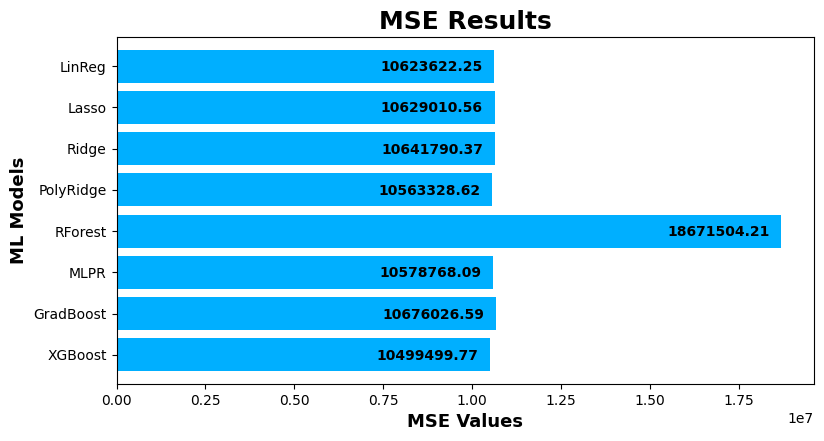

In [56]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyRidge', 'RForest', 'MLPR', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_mse[i]-3200000, i+0.12, "{:.2f}".format(res_mse[i]), fontweight='bold')
plt.show()

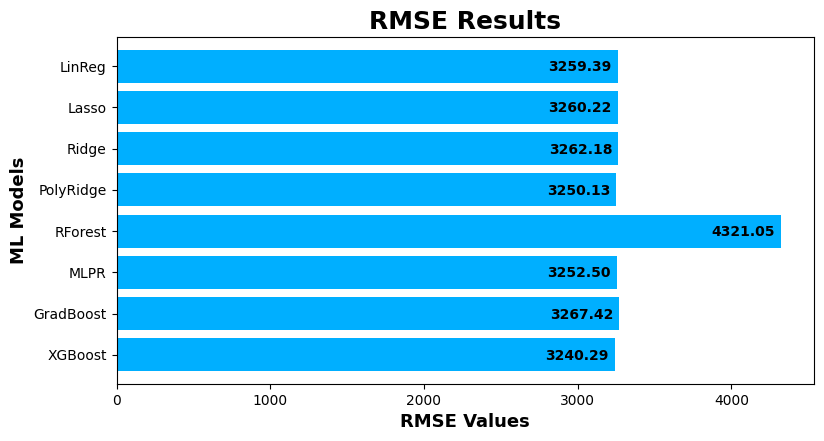

In [57]:
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_rmse[i]-450, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

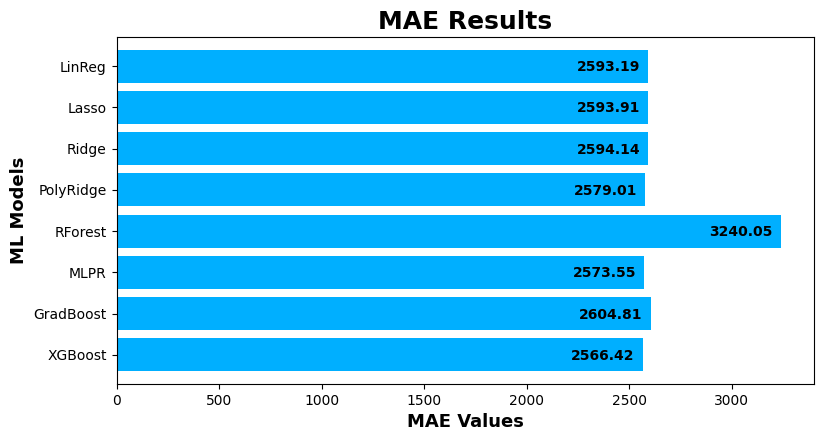

In [58]:
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_mae[i]-350, i+0.12, "{:.2f}".format(res_mae[i]), fontweight='bold')
plt.show()

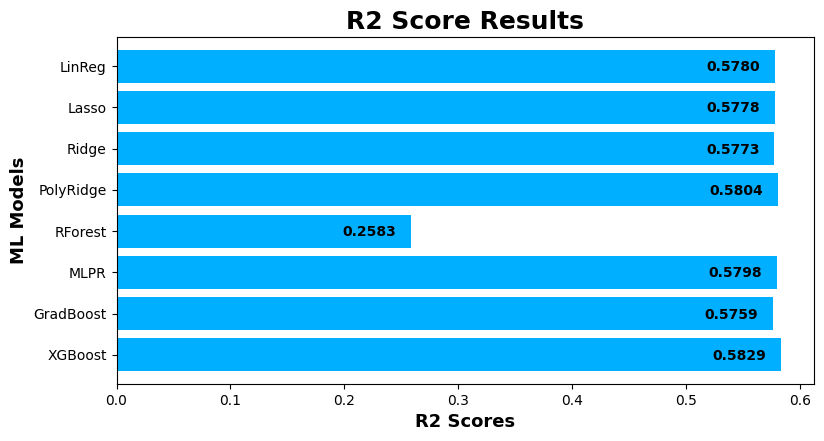

In [59]:
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_r2[i]-0.06, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

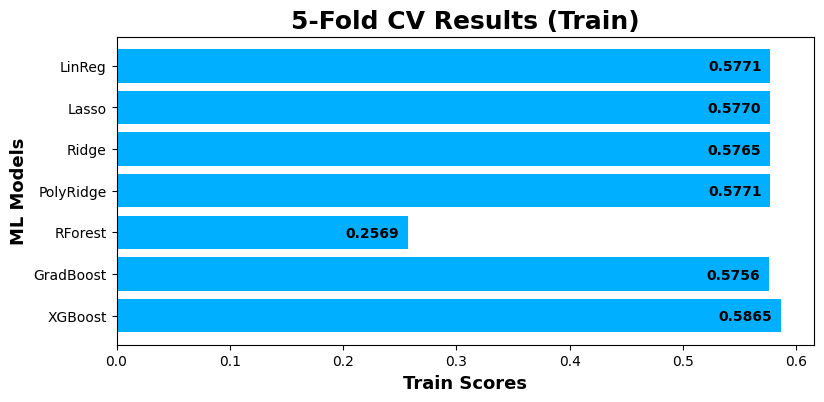

In [70]:
plt.figure(figsize=(9,4))
plt.barh(range(7), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(7), methods[:5]+methods[6:])
plt.ylim(6.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(7):
    plt.text(res_cv_train[i]-0.055, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

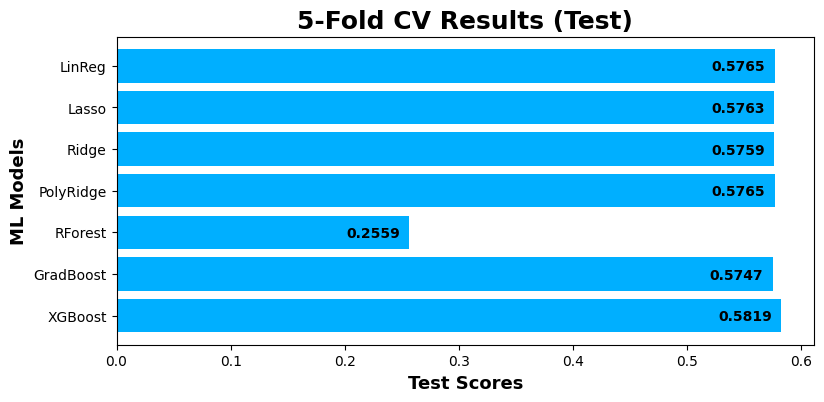

In [72]:
plt.figure(figsize=(9,4))
plt.barh(range(7), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(7), methods[:5]+methods[6:])
plt.ylim(6.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(7):
    plt.text(res_cv_test[i]-0.055, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()